NOTE: This notebook runs LogisticRegression without Lasso (L1) or Ridge (L2) regularization. For this you need SKlearn 0.21.3. 

For users who are to Python: you can check the version you have by entering 
                conda list 
in the Anaconda Prompt. To update an earlier version enter 
            conda update python 
in the Anaconda Prompt. 

LENDING CLUB BACKGROUND
Lending Club is a peer-to-peer (P2P) lending platform, where borrowers submit their loan applications and individual lenders select the applications that they want to fund. Borrowers receive the full amount of the issued loan minus the origination fee, which is paid to the company. Investors purchase notes backed by the personal loans and pay Lending Club a service fee.

P2P lending brings down the cost of personal loans compared to traditional financing by connecting the borrowers and investors directly. However, there is always a risk of investing in a bad loan. In fact, the default rate for P2P loans are much higher than that of traditional loans. Therefore, the lending industry is highly interested in providing the investors with comprehensive risk assessment of the loan applications. The company shares data about all loan applications made through its platform. 

THIS CODE
This code uses loans from the period of October 2007 to September 2017 that were current or charged off (defaulted).This code uses logistic regression to to develop a predictive model.

In [3]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [4]:
train = pd.read_excel('lendingclub_traindata.xlsx')
test = pd.read_excel('lendingclub_testdata.xlsx')

# 1 = good, 0 = default

# give column names
cols = ['home_ownership', 'income', 'dti', 'fico_low', 'loan_status']
train.columns = test.columns = cols

print(train.head())
print("--------------------------------")
print(test.head())

   home_ownership  income    dti  fico_low  loan_status
0               1  44.304  18.47       690            0
1               0  38.500  33.73       660            0
2               1  54.000  19.00       660            0
3               1  60.000  33.98       695            0
4               0  39.354  10.85       685            0
--------------------------------
   home_ownership  income    dti  fico_low  loan_status
0               1   127.0  10.94       675            0
1               1   197.0  15.64       710            0
2               1    25.5  28.75       670            0
3               1    80.0  20.16       660            0
4               0    57.0  30.60       675            0


For the purposes of this exercise, the dataset has already been split into train and test set. There are 8695 instances of training set and 5916 instances of test set with with four features and one target. The four features are home_ownership, income, dti and fico_low and the target is loan status that includes either fully paid or defaulted loans only. 

In [5]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status', 1)
X_test = test.drop('loan_status', 1)

# store target column
y_train = train['loan_status']
y_test = test['loan_status']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.columns

(8695, 4) (8695,) (5916, 4) (5916,)


Index(['home_ownership', 'income', 'dti', 'fico_low'], dtype='object')

In [6]:
majority_class = y_train.mode()[0]        # predict fully paid only
prediction = np.full(shape=y_train.shape, fill_value=majority_class)
accuracy_score(y_train, prediction)

0.8276020701552617

In [7]:
freq = y_train.value_counts()           # count frequency of different classes in loan status
freq/sum(freq)*100                      # get percentage of above

1    82.760207
0    17.239793
Name: loan_status, dtype: float64

<br>
Roughly 82% of data points are of majority (fully paid) class compared 17% in minority (defaulted) class. Acuracy of machine learning model trained on dataset with class imbalance will be high on train set but will not generalize to an unseen dataset. 

Accuracy is the sum of all correct predictions divided by the total number of instances. It is just the starting point. We should look more closely at the quality of the predictions for each class.

Training the model is the step where the algorithms "learn from the data" through numerous iterations over the the dataset. In the first few iterations, the algorithm is just learning and knows very little. However, after lots of iterations and correcting for previous mistakes, a well-train model can be developed. The parameters such as weights and biases (errors) are updated in each iteration.

Based on the complexity of data we can use simpler machine learning models or combine them with more advanced methods. In our case, the preprocessed data is fairly simple and since we are dealing with binary classification problem, logistic regression is a good point of start.

In [8]:
lgstc_reg =  LogisticRegression(penalty="none", solver='newton-cg')     # create an instance of logistic regression

lgstc_reg.fit(X_train, y_train)                                                             # fit training data on logistic regression 

print(lgstc_reg.intercept_, lgstc_reg.coef_)                                                # get the coefficients of each features

[-6.56519888] [[ 0.139496    0.00410667 -0.00112302  0.01125205]]


<br>
The bias is estimated as -6.56517476. The coefficient of the logistic regression are 0.13949599 for home_ownership, 0.0041 0667 for income, -0.00112303 for dti and 0.01125202 for fico_low. These are the weights (parameters) that maximizes the likelihood of producing our given data and hence gives us the least error in predicting our response variable.

The question of how to evaluate the model is of the utmost importance. This is where we will test the model's performance on an unseen test set and check the results of our chosen measure of success. This step is meant to be representative of how the model might perform in the real world.

In [9]:
y_pred = lgstc_reg.predict(X_test)                           # predict default loans based on test data set

acc = accuracy_score(y_test, y_pred)                         # check the accuracy of the model

print('accuracy of logistic regression model=%.3f' % (acc) )

accuracy of logistic regression model=0.821


<br> 
An analyst must decide on a criterion for predicting whether loan will be good or default. This involves specifying a threshold. By default this threshold is set to 0.5. However, we can look at the results for few other thresholds. Ideally, if the probability that the loan will be good is higher then we should account for that in our decision. 

**CONFUSION MATRIX**

In addition, the accuracy of logistic regression model is the same as that of the naive model. However, we know that accuracy alone can be a misleading. Hence, we will begin by analyzing the results of the confusion matrix to check the quality of prediction. 

A confusion matrix summarizes the performance of classification algorithms by tabulating instances of actual classes in row and instances of predicted classes in column. This makes it easy to see the misclassifications made by the algorithms.

77.58620689655173
4.530087897227856
16.26098715348208
1.6227180527383367
---------------------------------------

THRESHOLD: 0.75 
accuracy: 0.7920892494929006




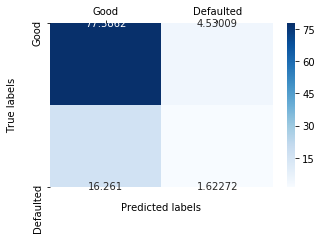

55.341446923597026
26.774847870182555
9.753211629479377
8.13049357674104
---------------------------------------

THRESHOLD: 0.8 
accuracy: 0.6347194050033806




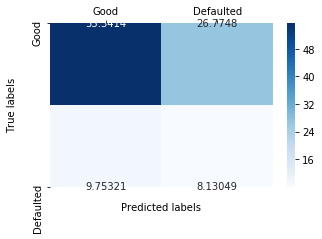

28.65111561866126
53.46517917511833
3.7356321839080464
14.148073022312374
---------------------------------------

THRESHOLD: 0.85 
accuracy: 0.4279918864097363




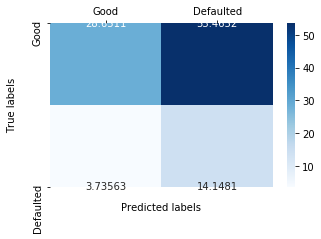

In [49]:
THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
             
j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold    
    
    
    lgstc_reg.fit(X_train, y_train)                                                                        # fit data to model
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / 5916 )*100                   # confusion matrix (in percentage)
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    print(TP)
    print(FN)
    print(FP)
    print(TN)
    
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
    
    print( '---------------------------------------\n' )
    print('THRESHOLD:', i, '\naccuracy:', results.iloc[j,1])
    print( '\n' )
    
    plt.figure(figsize=(5, 3))      # format the plot size
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="Blues")
    ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')
    ax.xaxis.tick_top()
    ax.yaxis.set_ticklabels(['Good', 'Defaulted'])
    ax.xaxis.set_ticklabels(['Good', 'Defaulted'])
    plt.show()

    j += 1

<br>
We note here from the confusion matrix at threshold 0.75 that while the model is good at identifying good loans, however it isn't good at identifying the bad loans at all.

We also note that increasing the threshold results in decrease in overall accuracy. But the percentage of default loans identified as default is higher with increasing threshold. We know by now that maximizing the accuracy does not necessarily create the best model. Thus, lets look at some other metrics.

In [11]:
print( 'ALL METRICS' )
print( results.T )

ALL METRICS
                   0         1         2
THRESHOLD       0.75       0.8      0.85
accuracy    0.792089  0.634719  0.427992
recall      0.944833   0.67394  0.348909
tnr        0.0907372  0.454631  0.791115
fpr         0.909263  0.545369  0.208885
precision   0.826729  0.850169  0.884656
f1_score    0.881844  0.751866  0.500443


<br>
Recall and true negative rate are also decreasing with increase in threshold rate. However, precision and false positive rate are increasing with increasing threshold. 

In [48]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=10000)

y_train_1darray = y_train.values.flatten()
y_val_1darray = y_test.values.flatten()

print(type(X_train))
print(type(y_train_1darray))
#print(y_train_1darray)

#print(y_train_1darray.shape)
#print(y_train_1darray)

print("Fitting")
mlp.fit(X_train,y_train_1darray.astype(int))

#print(X_train)
print("Predicting")
predictions = mlp.predict(X_test)

#print(mse(y_val_1darray,predictions))

#print(mlp.score(X_val, y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Fitting
Predicting
Done


In [46]:
from sklearn.metrics import classification_report,confusion_matrix#,plot_confusion_matrix
print(confusion_matrix(y_val_1darray.astype(int),predictions, labels=[0,1]  ))

#for i in range(len(y_val_1darray)):
#    print(y_val_1darray-predictions)

print(type(y_val_1darray))
print(type(predictions))

y_val_df = pd.DataFrame(data=y_val_1darray)
y_val_df.to_excel('y_val_df.xlsx')

predictions_df = pd.DataFrame(data=predictions)
predictions_df.to_excel('predictions_df.xlsx')
#print(predictions)

[[  63  995]
 [ 218 4640]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [47]:
print(classification_report(y_val_1darray.astype(int),predictions))

              precision    recall  f1-score   support

           0       0.22      0.06      0.09      1058
           1       0.82      0.96      0.88      4858

    accuracy                           0.79      5916
   macro avg       0.52      0.51      0.49      5916
weighted avg       0.72      0.79      0.74      5916

